# Importing Neccesary libraries

In [1]:
import tensorflow as tf
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
my_data_dir = 'C:\\Users\\ragha\\Desktop\\ML_Project\\Multi_class_Black_Fungus\\Multi_class_Black_Fungus'

In [3]:
os.listdir(my_data_dir)

['.ipynb_checkpoints', 'eyes.ipynb', 'test', 'Train']

In [4]:
test_path = my_data_dir + '\\test'
train_path = my_data_dir + '\\Train'

In [5]:
os.listdir(train_path)

['infected_eye', 'normal_eye']

# Data Visualization

In [6]:
os.listdir(train_path + '//infected_eye')[0]

'(1).jpg'

In [7]:
inf_eye = train_path + '//infected_eye' + '//(1).jpg'

In [8]:
ieye_img = imread(inf_eye)

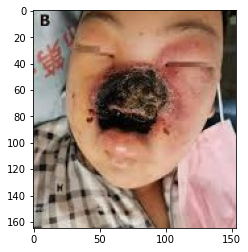

In [9]:
plt.imshow(ieye_img)

In [10]:
ieye_img.shape

(165, 154, 3)

In [11]:
os.listdir(train_path + '//normal_eye')[1]

'143950153_1.jpg'

In [12]:
ninf_eye = train_path + '//normal_eye' + '//143950153_1.jpg'

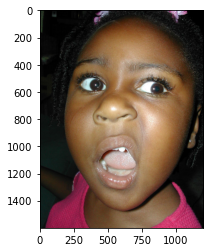

In [13]:
neye_img = imread(ninf_eye)
plt.imshow(neye_img)

In [14]:
neye_img.shape

(1600, 1200, 3)

In [15]:
os.listdir(test_path + '//infected_eye')[3]

'(23).jpg'

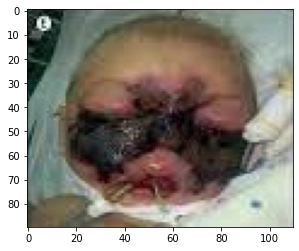

In [16]:
inf_eye = test_path + '//infected_eye' + '//(23).jpg'
ieye_img = imread(inf_eye)
plt.imshow(ieye_img)

In [17]:
num_infectedeye_tr = len(os.listdir(train_path + '//infected_eye'))

In [18]:
num_infectedeye_tr

66

In [19]:
num_normaleye_tr = len(os.listdir(train_path + '//normal_eye'))

In [20]:
num_normaleye_tr 

51

In [21]:
num_test = len(os.listdir(test_path))

In [22]:
num_infeye_test = len(os.listdir(test_path + '//infected_eye'))

In [23]:
num_infeye_test

24

In [24]:
num_normaleye_test = len(os.listdir(test_path + '//normal_eye'))
num_normaleye_test

28

In [25]:
train_dir = 'C:\\Users\\ragha\\Desktop\\ML_Project\\Multi_class_Black_Fungus\\Multi_class_Black_Fungus\\Train'

In [26]:
infected_imgs = [fn for fn in os.listdir(f'{train_dir}/infected_eye') if fn.endswith('.jpg')]
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/normal_eye') if fn.endswith('.jpg')]

In [27]:
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
infected_images = img2np(f'{train_dir}/infected_eye/', infected_imgs)
normal_images = img2np(f'{train_dir}/normal_eye/', normal_imgs)

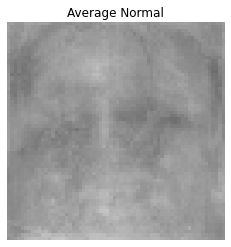

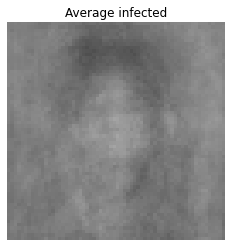

In [28]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

infected_mean = find_mean_img(infected_images, 'Normal')
normal_mean = find_mean_img(normal_images, 'infected')

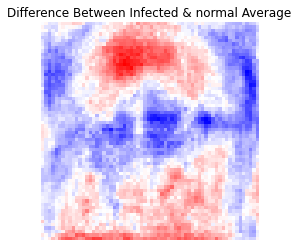

In [29]:
contrast_mean = infected_mean - normal_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Infected & normal Average')
plt.axis('off')
plt.show()

# Data Pre-Processing

In [30]:
BATCH_SIZE = 40 
IMG_SHAPE  = 150

In [31]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_path,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 109 images belonging to 2 classes.


In [32]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

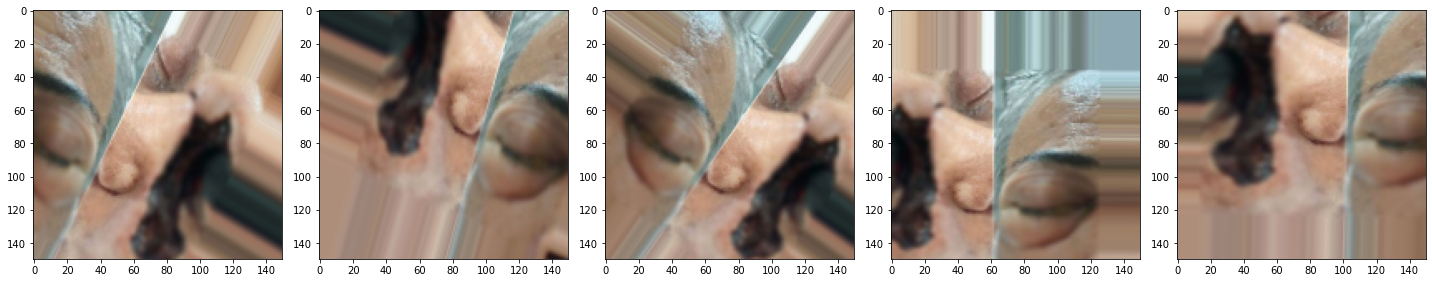

In [33]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [34]:
image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_path,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 52 images belonging to 2 classes.


In [35]:
train_data_gen.class_indices

{'infected_eye': 0, 'normal_eye': 1}

# CNN

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [40]:
cnn_result = model.fit_generator(train_data_gen,epochs=20,validation_data=test_data_gen,
                             callbacks=[early_stop])

C:\Users\ragha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 0.7863 - accuracy: 0.4954 - val_loss: 1.0629 - val_accuracy: 0.4615
Epoch 2/20
3/3 [==============================] - 5s 2s/step - loss: 0.7156 - accuracy: 0.6330 - val_loss: 0.6979 - val_accuracy: 0.4231
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6811 - accuracy: 0.7431 - val_loss: 0.7073 - val_accuracy: 0.4231
Epoch 4/20
3/3 [==============================] - 4s 2s/step - loss: 0.6704 - accuracy: 0.6239 - val_loss: 0.7423 - val_accuracy: 0.4615
Epoch 5/20
3/3 [==============================] - 4s 2s/step - loss: 0.6323 - accuracy: 0.6606 - val_loss: 0.8649 - val_accuracy: 0.4231
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.6174 - accuracy: 0.6422 - val_loss: 1.3084 - val_accuracy: 0.4615
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.7458 - accuracy: 0.6147 - val_loss: 1.0075 - val_accuracy: 0.4615


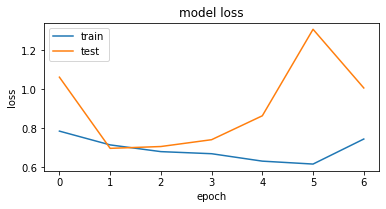

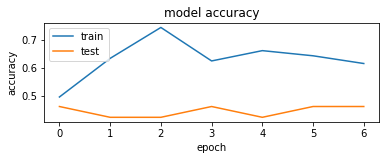

In [42]:
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(cnn_result.history['loss'])
plt.plot(cnn_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.subplot(2, 1, 2)
plt.plot(cnn_result.history['accuracy'])
plt.plot(cnn_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# VGG16

In [43]:
from tensorflow.keras.applications.vgg16 import VGG16

In [44]:
base_model = VGG16(input_shape = (150, 150, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [45]:
for layer in base_model.layers:
    layer.trainable = False

In [46]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

C:\Users\ragha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [47]:
vgg16_result = model.fit_generator(train_data_gen,epochs=20,validation_data=test_data_gen,
                             callbacks=[early_stop])

Epoch 1/20
3/3 [==============================] - 18s 6s/step - loss: 1.2125 - acc: 0.5046 - val_loss: 0.8896 - val_acc: 0.5385
Epoch 2/20
3/3 [==============================] - 16s 6s/step - loss: 0.8818 - acc: 0.5138 - val_loss: 0.8666 - val_acc: 0.5000
Epoch 3/20
3/3 [==============================] - 18s 6s/step - loss: 0.5303 - acc: 0.7706 - val_loss: 0.7490 - val_acc: 0.5192
Epoch 4/20
3/3 [==============================] - 17s 7s/step - loss: 0.4733 - acc: 0.7798 - val_loss: 0.7296 - val_acc: 0.5769
Epoch 5/20
3/3 [==============================] - 17s 6s/step - loss: 0.3918 - acc: 0.8991 - val_loss: 0.8586 - val_acc: 0.5192
Epoch 6/20
3/3 [==============================] - 17s 6s/step - loss: 0.7258 - acc: 0.5780 - val_loss: 0.5869 - val_acc: 0.6346
Epoch 7/20
3/3 [==============================] - 17s 6s/step - loss: 0.5666 - acc: 0.6697 - val_loss: 0.8450 - val_acc: 0.5192
Epoch 8/20
3/3 [==============================] - 17s 6s/step - loss: 0.3425 - acc: 0.8440 - val_loss: 0

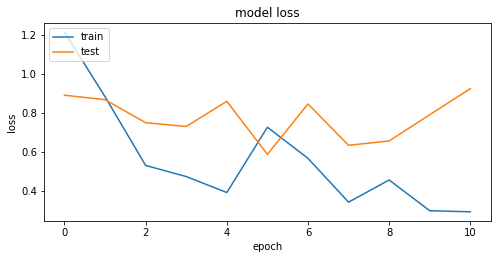

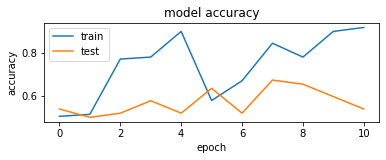

In [48]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(vgg16_result.history['loss'])
plt.plot(vgg16_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.subplot(2, 1, 2)
plt.plot(vgg16_result.history['acc'])
plt.plot(vgg16_result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# INCEPTION

In [49]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [50]:
base_model = InceptionV3(input_shape = (IMG_SHAPE, IMG_SHAPE, 3), include_top = False, weights = 'imagenet')

In [51]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [52]:
for layer in base_model.layers:
    layer.trainable = False

In [53]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [54]:
inc_result = model.fit_generator(train_data_gen,epochs=20,validation_data=test_data_gen,
                             callbacks=[early_stop])

Epoch 1/20
3/3 [==============================] - 14s 3s/step - loss: 8.2427 - acc: 0.5872 - val_loss: 7.2817 - val_acc: 0.5385
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 4.2032 - acc: 0.6697 - val_loss: 1.7131 - val_acc: 0.6731
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 0.1460 - acc: 0.9541 - val_loss: 0.8582 - val_acc: 0.6731
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.1543 - acc: 0.9266 - val_loss: 2.0756 - val_acc: 0.6538
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.4912 - acc: 0.8532 - val_loss: 0.8287 - val_acc: 0.7115
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.1979 - acc: 0.9541 - val_loss: 2.5229 - val_acc: 0.6154
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.1766 - acc: 0.9450 - val_loss: 0.9605 - val_acc: 0.7308
Epoch 8/20
3/3 [==============================] - 6s 2s/step - loss: 0.0961 - acc: 0.9725 - val_loss: 0.9543 -

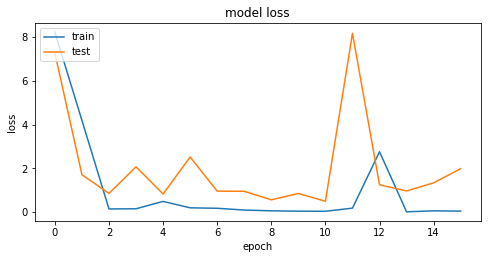

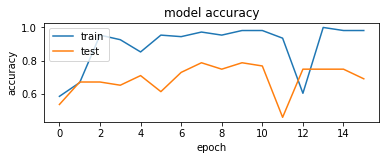

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(inc_result.history['loss'])
plt.plot(inc_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.subplot(2, 1, 2)
plt.plot(inc_result.history['acc'])
plt.plot(inc_result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Resnet50

In [56]:
from tensorflow.keras.applications import ResNet50

In [57]:
base_model = ResNet50(input_shape=(IMG_SHAPE,IMG_SHAPE,3), include_top=False, weights="imagenet")

In [58]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [59]:
for layer in base_model.layers:
    layer.trainable = False

In [60]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [61]:
resnet_result = model.fit_generator(train_data_gen,epochs=20,validation_data=test_data_gen,
                             callbacks=[early_stop])

Epoch 1/20
3/3 [==============================] - 18s 5s/step - loss: 2.3998 - acc: 0.5688 - val_loss: 0.8195 - val_acc: 0.4615
Epoch 2/20
3/3 [==============================] - 11s 4s/step - loss: 1.3438 - acc: 0.5505 - val_loss: 0.6891 - val_acc: 0.5385
Epoch 3/20
3/3 [==============================] - 10s 4s/step - loss: 1.2312 - acc: 0.5046 - val_loss: 2.5121 - val_acc: 0.4615
Epoch 4/20
3/3 [==============================] - 11s 4s/step - loss: 1.2595 - acc: 0.5229 - val_loss: 0.6905 - val_acc: 0.5385
Epoch 5/20
3/3 [==============================] - 12s 4s/step - loss: 0.6469 - acc: 0.6514 - val_loss: 1.8908 - val_acc: 0.4615
Epoch 6/20
3/3 [==============================] - 13s 4s/step - loss: 1.2859 - acc: 0.5413 - val_loss: 0.7408 - val_acc: 0.4808
Epoch 7/20
3/3 [==============================] - 11s 4s/step - loss: 0.7589 - acc: 0.5505 - val_loss: 2.1229 - val_acc: 0.4615


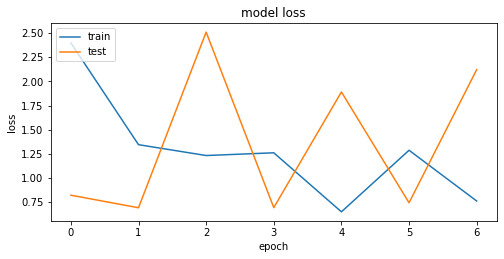

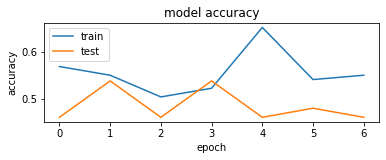

In [62]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(resnet_result.history['loss'])
plt.plot(resnet_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.subplot(2, 1, 2)
plt.plot(resnet_result.history['acc'])
plt.plot(resnet_result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EFFICIENT-NET

In [63]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in c:\users\ragha\anaconda3\lib\site-packages (1.1.1)


In [64]:
import efficientnet.keras as efn

In [65]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(input_shape = (IMG_SHAPE,IMG_SHAPE, 3), include_top = False, weights = 'imagenet')

In [66]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [67]:
for layer in base_model.layers:
    layer.trainable = False

In [68]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

C:\Users\ragha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [69]:
eff_result = model.fit_generator(train_data_gen,epochs=20,validation_data=test_data_gen,
                             callbacks=[early_stop])

C:\Users\ragha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
3/3 [==============================] - 23s 4s/step - loss: 5.2268 - acc: 0.5229 - val_loss: 2.2654 - val_acc: 0.5385
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: 1.5728 - acc: 0.4771 - val_loss: 0.7597 - val_acc: 0.4615
Epoch 3/20
3/3 [==============================] - 8s 3s/step - loss: 0.9400 - acc: 0.5413 - val_loss: 0.8359 - val_acc: 0.5385
Epoch 4/20
3/3 [==============================] - 7s 3s/step - loss: 0.9296 - acc: 0.5138 - val_loss: 0.9642 - val_acc: 0.4615
Epoch 5/20
3/3 [==============================] - 7s 2s/step - loss: 0.6796 - acc: 0.6055 - val_loss: 0.7326 - val_acc: 0.4615
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 0.7027 - acc: 0.6697 - val_loss: 0.7093 - val_acc: 0.5385
Epoch 7/20
3/3 [==============================] - 7s 2s/step - loss: 1.1857 - acc: 0.4587 - val_loss: 0.9346 - val_acc: 0.4615
Epoch 8/20
3/3 [==============================] - 8s 3s/step - loss: 0.8287 - acc: 0.5872 - val_loss: 1.1030 -

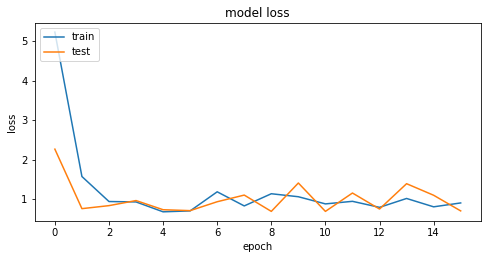

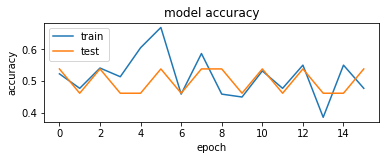

In [70]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(eff_result.history['loss'])
plt.plot(eff_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.subplot(2, 1, 2)
plt.plot(eff_result.history['acc'])
plt.plot(eff_result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Comparing Models

In [71]:
Model_names = ['CNN', 'VGG16', 'Inception' , 'Resnet50', 'Effiecient-Net']
Accuracy_values = [0.4615,0.6538,0.7885,0.538,0.5385]

Text(0.5, 1.0, 'Accuracy Score Comparision using bar plot')

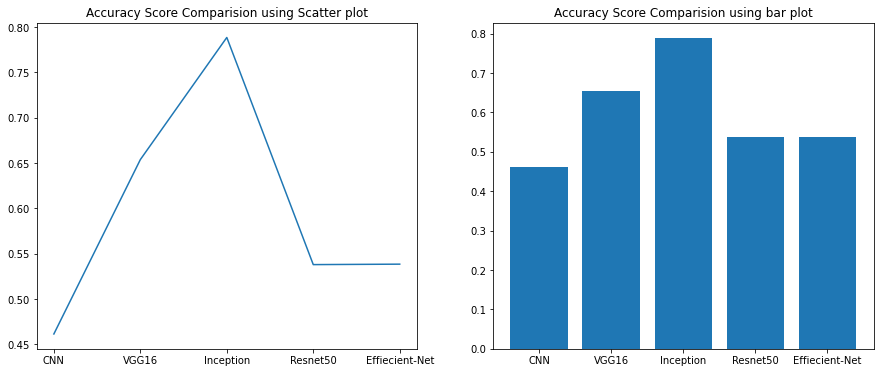

In [72]:
f,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].plot(Model_names,Accuracy_values)
ax[0].set_title('Accuracy Score Comparision using Scatter plot')
ax[1].bar(Model_names,Accuracy_values)
ax[1].set_title('Accuracy Score Comparision using bar plot')